In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\SHAANG KIRUTHIK\Downloads\python project\Electric_Vehicle_Population_Data.csv")

In [2]:
print(df.isnull().sum())

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        36
Base MSRP                                             36
Legislative District                                 494
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


In [3]:
df["County"]=df["County"].fillna(df["County"].mode()[0])
df["City"]=df["City"].fillna(df["City"].mode()[0])
df["Postal Code"]=df["Postal Code"].fillna(df["Postal Code"].median())
df["Legislative District"]=df["Legislative District"].fillna(df["Legislative District"].median())
df["Vehicle Location"]=df["Vehicle Location"].fillna(df["Vehicle Location"].mode()[0])
df["Electric Utility"]=df["Electric Utility"].fillna(df["Electric Utility"].mode()[0])
df["2020 Census Tract"]=df["2020 Census Tract"].fillna(df["2020 Census Tract"].mode()[0])
print(df.isnull().sum())
#1)Find out which electric vehicle types are common in top cities

# Count vehicle types per city
top_cities = df['City'].value_counts().head(10).index
filtered = df[df['City'].isin(top_cities)]

VIN (1-10)                                            0
County                                                0
City                                                  0
State                                                 0
Postal Code                                           0
Model Year                                            0
Make                                                  0
Model                                                 0
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                       36
Base MSRP                                            36
Legislative District                                  0
DOL Vehicle ID                                        0
Vehicle Location                                      0
Electric Utility                                      0
2020 Census Tract                                     0
dtype: int64


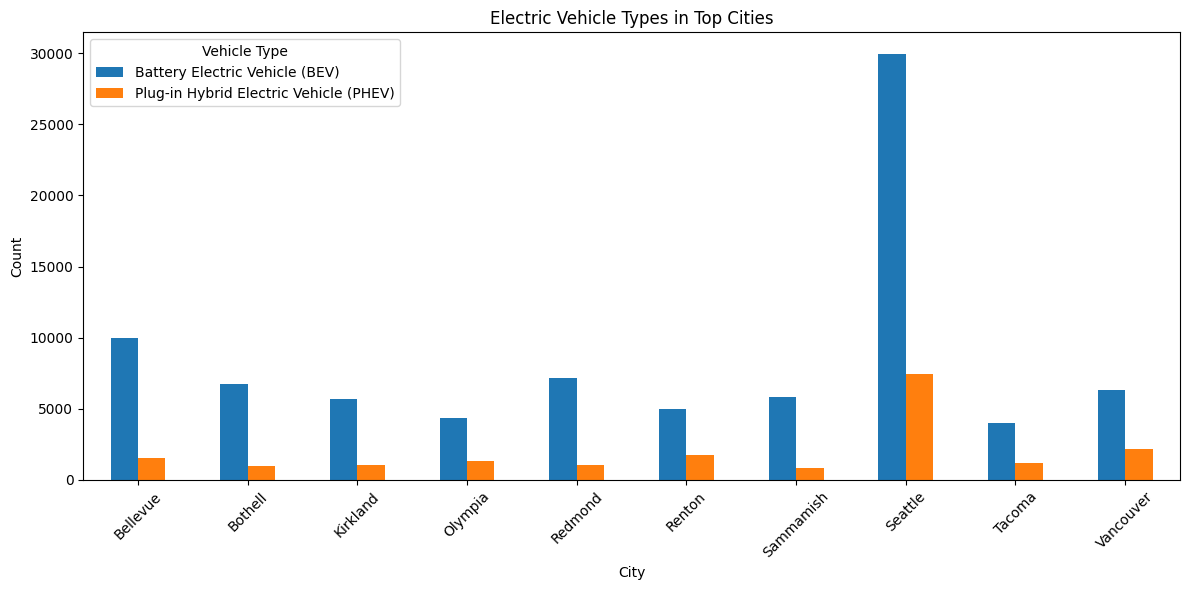

In [5]:
# Group by city and vehicle type
type_counts = filtered.groupby(['City', 'Electric Vehicle Type']).size().unstack()
type_counts.plot(kind='bar', figsize=(12,6))
plt.title("Electric Vehicle Types in Top Cities")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Vehicle Type")
plt.tight_layout()
plt.show()

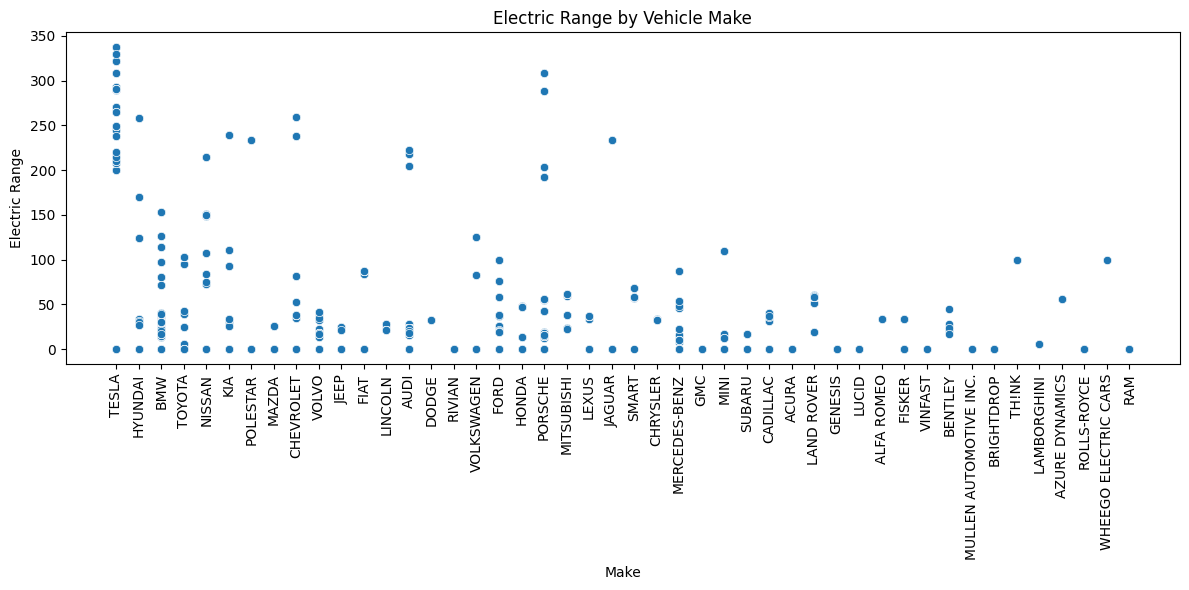

In [6]:

# 2. Check how electric range changes across different vehicle makes

plt.figure(figsize=(12,6))
sns.scatterplot(x="Make", y="Electric Range",data=df)
plt.title("Electric Range by Vehicle Make")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


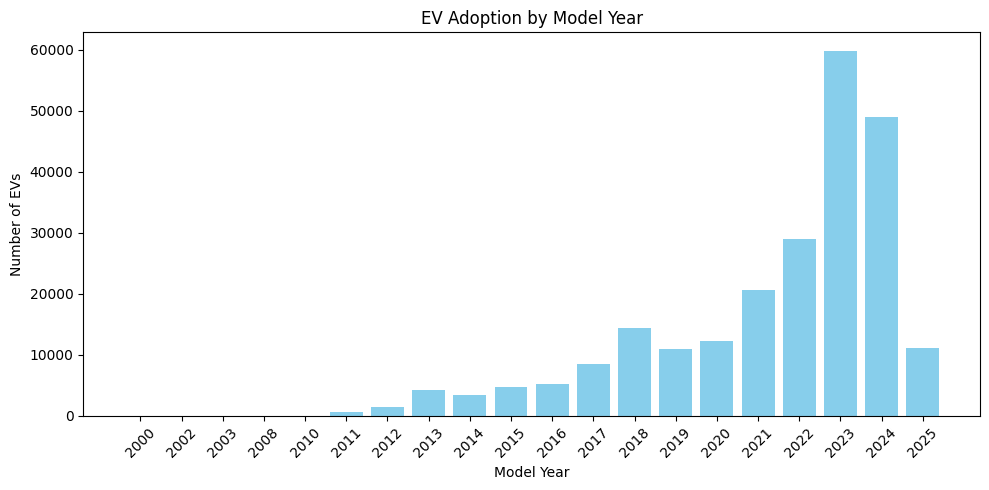

In [7]:
#3 Compare number of EVs by model year
model_year_counts = df['Model Year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(model_year_counts.index.astype(str), model_year_counts.values, color='skyblue')
plt.xlabel("Model Year")
plt.ylabel("Number of EVs")
plt.title("EV Adoption by Model Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

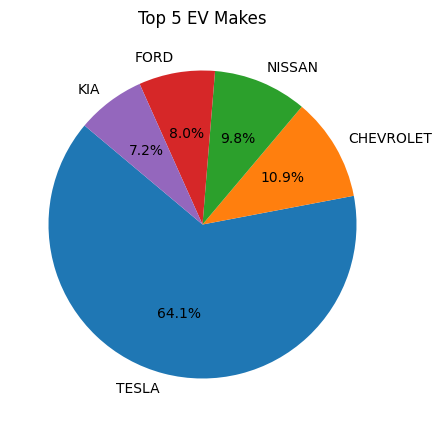

In [8]:

#4.Find the most popular vehicle in "make" and "model"
top_makes = df['Make'].value_counts().head(5)

plt.figure(figsize=(8,5))
plt.pie(top_makes.values, labels=top_makes.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 EV Makes")
plt.show()


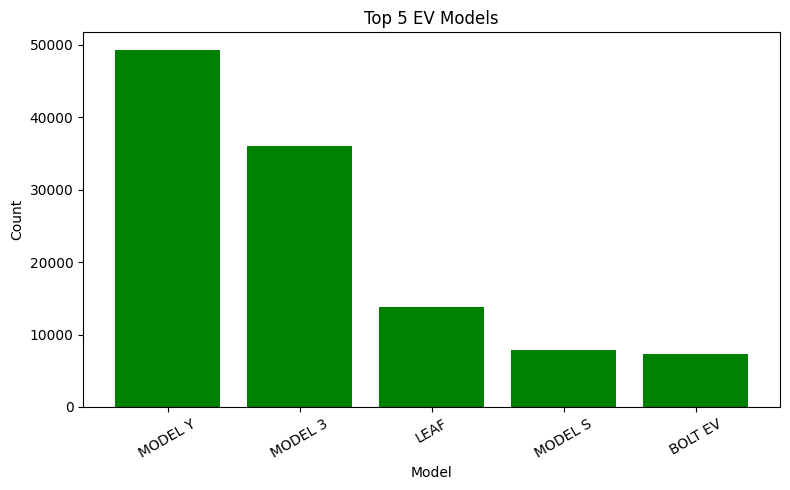

In [9]:
# Optional: Top models
top_models = df['Model'].value_counts().head(5)
plt.figure(figsize=(8,5))
plt.bar(top_models.index, top_models.values, color='green')
plt.title("Top 5 EV Models")
plt.xlabel("Model")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


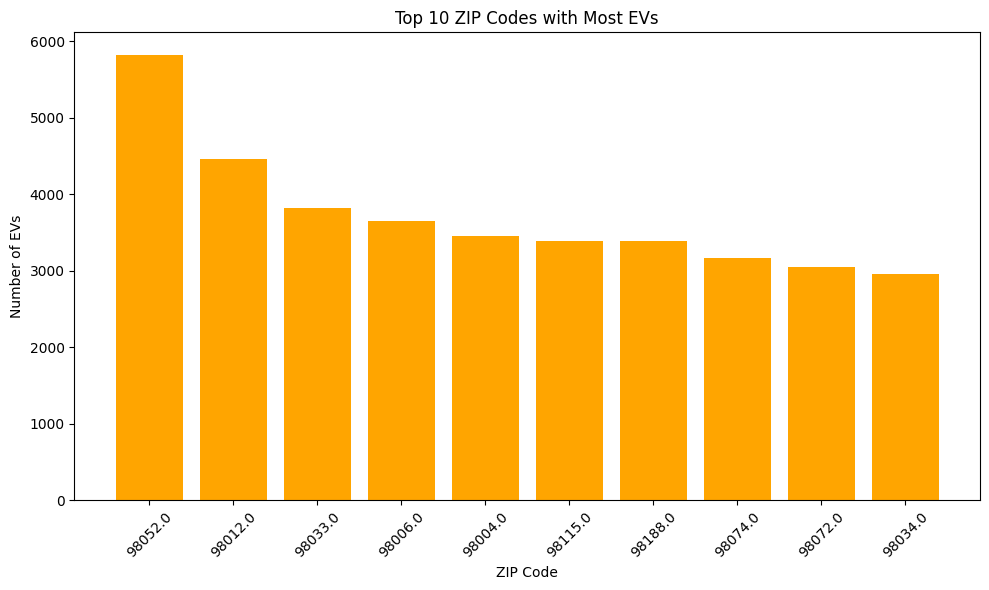

In [10]:
#5. Explore EV popularity by ZIP Code or City


zip_counts = df['Postal Code'].value_counts().head(10)

plt.figure(figsize=(10,6))
plt.bar(zip_counts.index.astype(str), zip_counts.values, color='orange')
plt.title("Top 10 ZIP Codes with Most EVs")
plt.xlabel("ZIP Code")
plt.ylabel("Number of EVs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



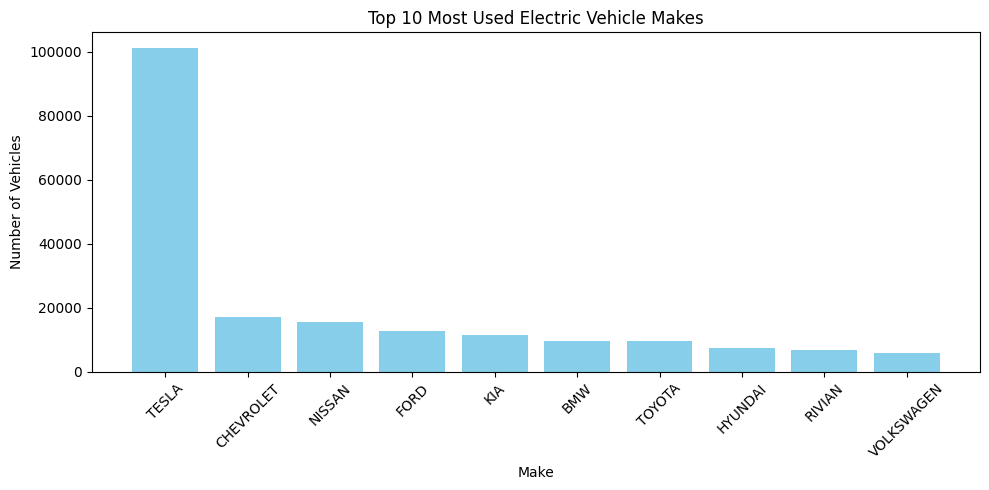

In [11]:
#6.Finding out which electric car make is used the most by using a bar graph

# Count the number of cars for each make
make_counts = df['Make'].value_counts().head(10)  # Top 10 makes

# Create bar graph
plt.figure(figsize=(10,5))
plt.bar(make_counts.index, make_counts.values, color='skyblue')
plt.title("Top 10 Most Used Electric Vehicle Makes")
plt.xlabel("Make")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


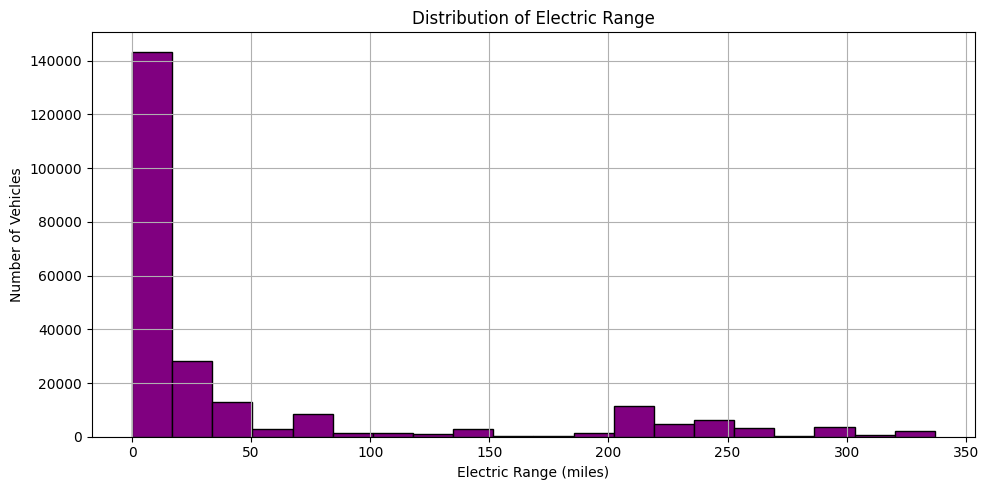

In [12]:
#7. This will show how many vehicles fall into different electric range values.

# Histogram of Electric Range
plt.figure(figsize=(10,5))
plt.hist(df['Electric Range'], bins=20, color='purple', edgecolor='black')
plt.title("Distribution of Electric Range")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Number of Vehicles")
plt.grid()
plt.tight_layout()
plt.show()


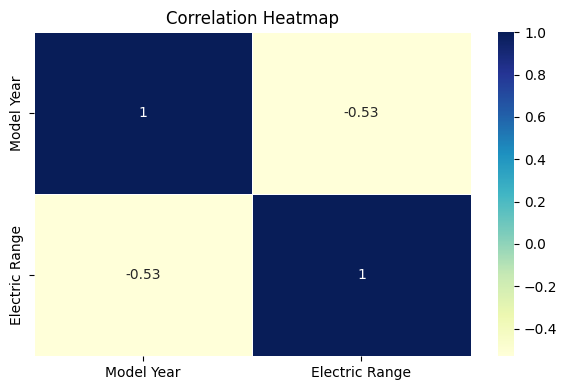

In [13]:
#8.Heatmap: Correlation Between Numeric Columns
#This will show relationships between numeric features like Electric Range, Model Year


# Selecting numeric columns for correlation
numeric_data = df[['Model Year', 'Electric Range']]

# Create the correlation matrix
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()
